# Lead Scoring

#### Problem Statement:

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.



#### Business Goal:
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Reading and Understanding the Data

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler

In [3]:
# Importing the dataset

df = pd.read_csv("Leads.csv", encoding = "latin")

In [4]:
# Checking the head of the dataset

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the shape

df.shape

(9240, 37)

In [6]:
# Retrieving the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Getting an insight of the columns

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2: Data Cleaning

In [8]:
# Checking for Null Values

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking for percentage of Null Values in each column

missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Checking for duplicate values in the dataset

df[df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


- There are no duplicate values in the dataset.

In [11]:
# The following columns have a value called select. 

# a. Specialization
# b. How did you hear about X Education
# c. Lead Profile
# d. City

# Converting those values as NaN since the customer has not selected any option for these columns while entering the data.
# "Select" to NaN

df["Specialization"] = df["Specialization"].replace("Select", np.nan)
df["How did you hear about X Education"] = df["How did you hear about X Education"].replace("Select", np.nan)
df["Lead Profile"] = df["Lead Profile"].replace("Select", np.nan)
df["City"] = df["City"].replace("Select", np.nan)

In [12]:
# Checking for percentage of Null Values in each column

missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Observation:
- By adding columns with "Select" value, null values in "Specialization" column increased from 15.56% to 36.58%. 
- In "How did you hear about X Education" from 23.89% to 78.46%. 
- In "Lead Profile" from 29.32% to 74.19%.
- In "City" from 15.37% to 39.71%.

In [13]:
# Dropping the columns that have more than 30% of Null Values.

# a. Specialization
# b. How did you hear about X Education
# c. Tags
# d. Lead Quality
# e. Lead Profile
# f. City
# g. Asymmetrique Activity Index
# h. Asymmetrique Profile Index
# i. Asymmetrique Activity Score
# j. Asymmetrique Profile Score

df = df.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
            'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
            'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [14]:
# Checking the percentage of Null Values in each column after dropping columns with more than 30% null values

missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Following Columns have Null Values:
- Country
- Lead Source
- Total Visits
- Page Views Per Visit
- Last Activity
- What is your current occupation
- What matters most to you in choosing a course


##### Country

In [15]:
# Checking value counts for each value in country column

df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [16]:
# Checking the percentage of "India" as value in the Country column

Country_percentage = round(100*len(df[df["Country"] == "India"])/len(df["Country"]), 2)
print(Country_percentage)

70.26


In [17]:
# The country column has around 27% missing values and "India" alone occurs 70% of the time, hence we shall drop the column "Country"

df = df.drop(["Country"], axis = 1)

##### Lead Source

In [18]:
# Checking the value counts for column TotalVisits

df["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [19]:
# Checking the median of the column

df["TotalVisits"].median()

3.0

In [20]:
# Imputing the Null Values in "TotalVisits" by median value which is 3.0

df["TotalVisits"] = df["TotalVisits"].replace(np.nan, df["TotalVisits"].median())

##### Page Views Per Visit

In [21]:
# Checking the value counts for Page Views Per Visit

df["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [22]:
# Checking the median of the column

df["Page Views Per Visit"].median()

2.0

In [23]:
# Imputing the Null Values in "Page Views Per Visit" by median value which is 2.0

df["Page Views Per Visit"] = df["Page Views Per Visit"].replace(np.nan, df["Page Views Per Visit"].median())

##### Lead Source

In [24]:
# Checking the value counts for Lead Source

df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [25]:
# From the above we can notice that Google appears twice with different cases. Hence we shall convert all rows with value "Google".
# And since "Google" has large part of data, we can impute the null values with "Google".

df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

##### Last Activity

In [26]:
# Checking the value counts for "Last Activity"

df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [27]:
# Since we don't have any information regarding the last activity of the customer, we can add a new category - "Not available" for the null values

df["Last Activity"] = df["Last Activity"].replace(np.nan, "No Available")

##### What is your current occupation

In [28]:
# Checking the value counts for "What is your current occupation"

df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
# Since we don't have any information regarding the current occupation of the customer, we can add a new category - "No information" for the null values

df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan, "No Information")

##### What matters most to you in choosing a course

In [30]:
# Checking the value counts for "What matters most to you in choosing a course"

df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
# "Better Career Prospects" accounts for almost all the data points in "What matters most to you in choosing a course" column
# Moreover, this column has 29% missing values, hence we can drop the column

df = df.drop(["What matters most to you in choosing a course"], axis = 1)

In [32]:
# Checking the percentage of Null Values in each column after dropping some columns and Imputing missing values in some columns 

missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [33]:
df.shape

(9240, 25)

#### Outlier Treatment

In [34]:
# Checking for Outliers at 25%, 50%, 75%, 90%, 95%  and 99%

df.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


##### Observation: 
- From the above Table we can clearly observe that "TotalVisits" and "Page Views Per Visit" columns have outliers.

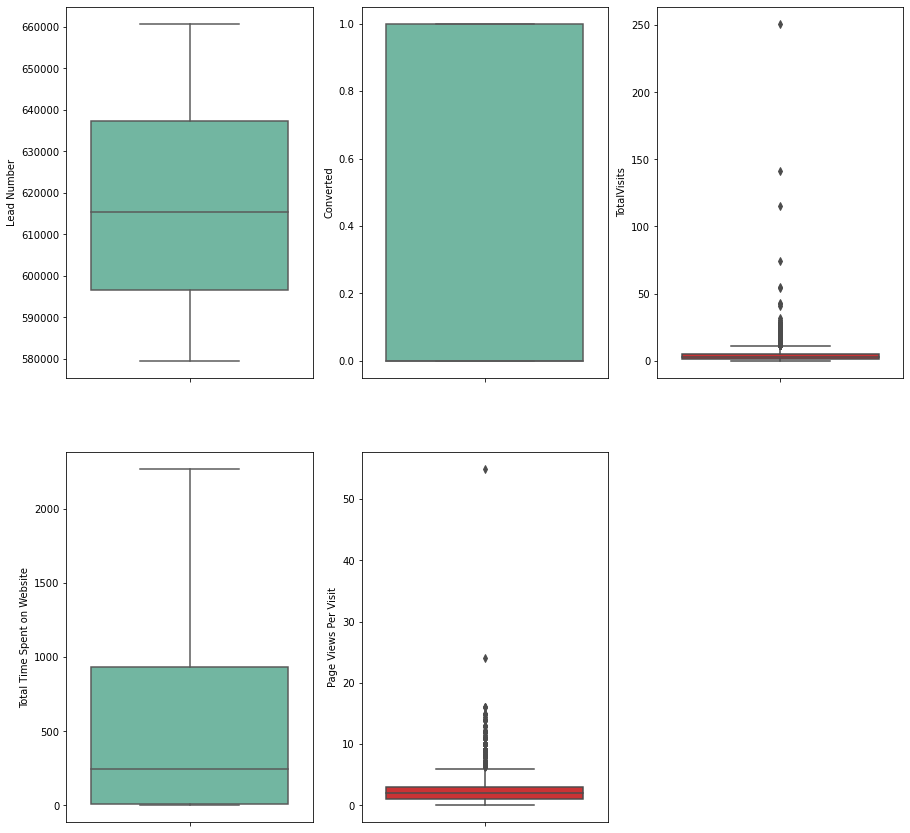

In [35]:
# Visualizing the Outliers of Numeric Columns

plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.boxplot(y = 'Lead Number', palette='Set2', data = df)
plt.subplot(2,3,2)
sns.boxplot(y = 'Converted', palette='Set2', data = df)
plt.subplot(2,3,3)
sns.boxplot(y = 'TotalVisits', palette='Set1', data = df)
plt.subplot(2,3,4)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = df)
plt.subplot(2,3,5)
sns.boxplot(y = 'Page Views Per Visit', palette='Set1', data = df)
plt.show()

- This subplot also clearly indicates the presence of outliers in "Total Visits" and "Page Views Per Visit" columns

In [36]:
# Removing values beyond 99% for "TotalVisits" and "Page Views Per Visit"

TotalVisits = df['TotalVisits'].quantile(0.99)
df = df[df["TotalVisits"] < TotalVisits]

Page_Views_Per_Visits = df['Page Views Per Visit'].quantile(0.99)
df = df[df["Page Views Per Visit"] < Page_Views_Per_Visits]


In [37]:
# Checking for Outliers at 25%, 50%, 75%, 90%, 95%  and 99%

df.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


##### Observation:
- The table shows absence of outliers in all the columns.

In [38]:
# Determining the percentage of Data retained after cleaning

Data_Percentage = round(100*(len(df)/9240), 2)
print(Data_Percentage)

97.72


- 97.72% data has been retained after cleaning.

### Step 3: Data Analysis

In [39]:
# Defining a function to create a barplot 

def Visualize(column):
    plt.figure(figsize=(15,10))
    data = df.groupby([column, 'Converted']).size().reset_index(name='Count')
    ax = sns.barplot(x=column, y='Count', hue='Converted', data=data, palette='RdBu', edgecolor='black')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', rotation=90)
    for x in ax.containers:
        ax.bar_label(x, label_type='edge', fontsize=10, labels=[f"{int(v.get_height())}" if not np.isnan(v.get_height()) else '0' for v in x])
    plt.show()


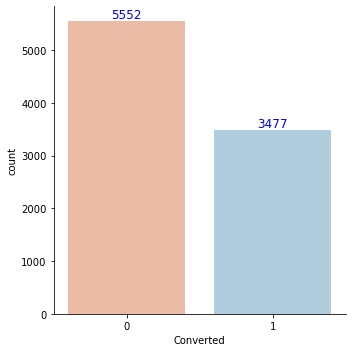

In [40]:
# Plotting the Conversion column

plot = sns.catplot(x="Converted", kind="count", data=df, palette="RdBu");

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()


- From the above plot, the conversion rate is around 38.4%

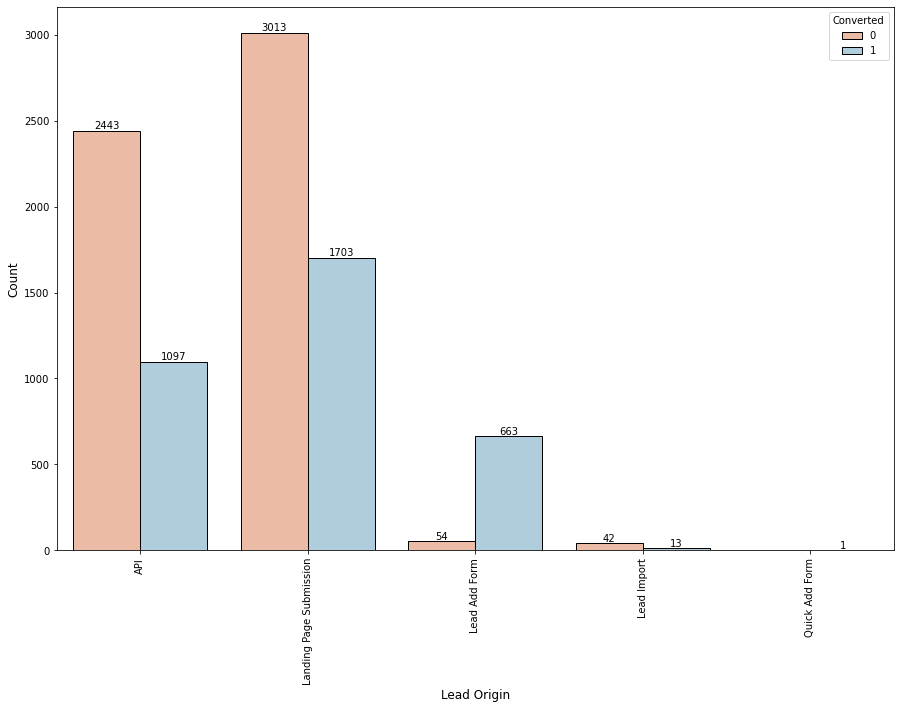

In [41]:
# Plotting the Lead Origin column

Visualize("Lead Origin")


#### Inference:
- Maximum conversions happen from Landing Page Submission followed by API.

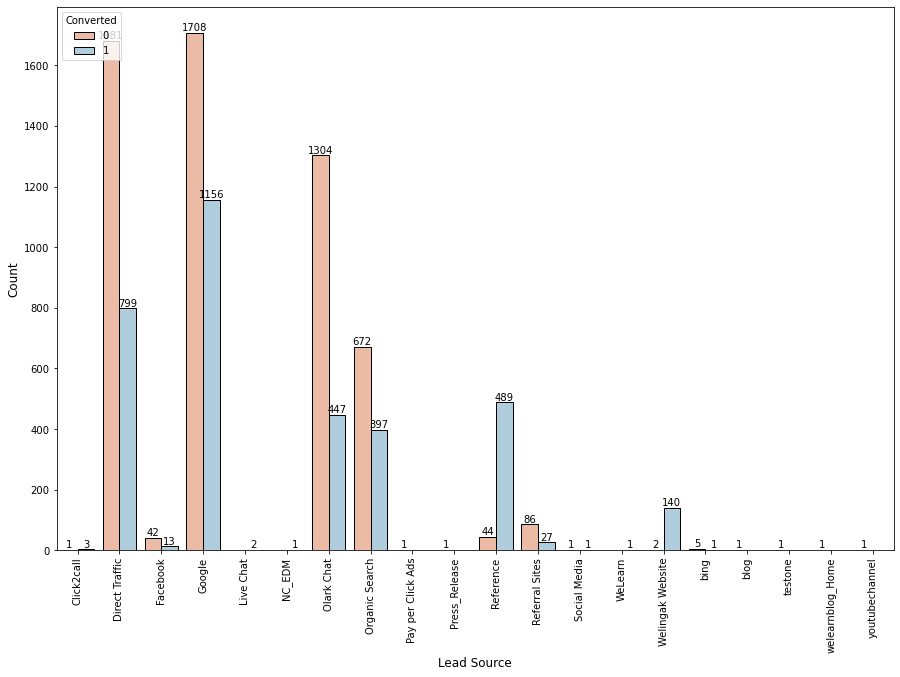

In [42]:
# Plotting the Lead Source column

Visualize("Lead Source")

#### Inference:
- The Lead source for maximum conversions is Google, followed by Direct Traffic. 

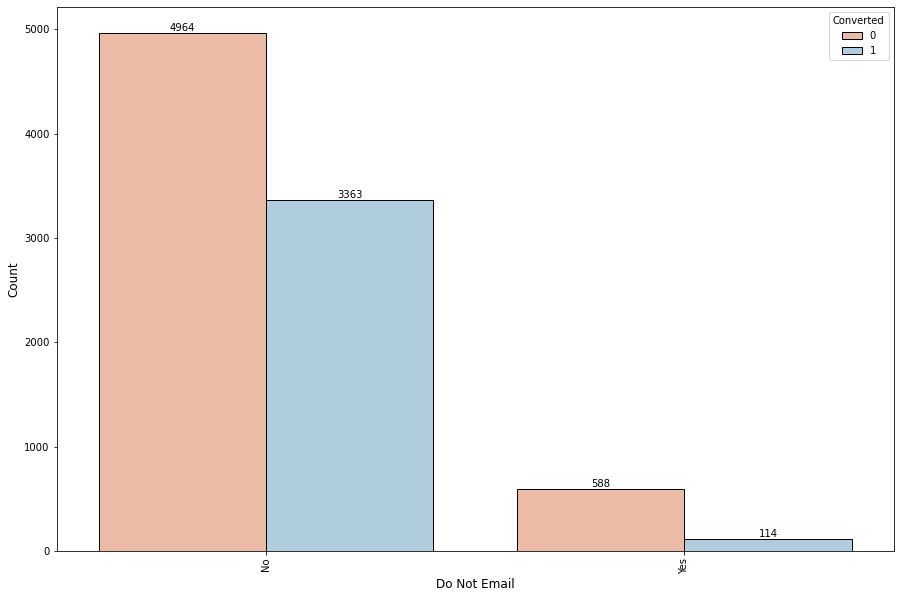

In [43]:
# Plotting the Do Not Email Column

Visualize("Do Not Email")

#### Inference:
- Most of the customers who converted, chose the option to recieve Emails. 

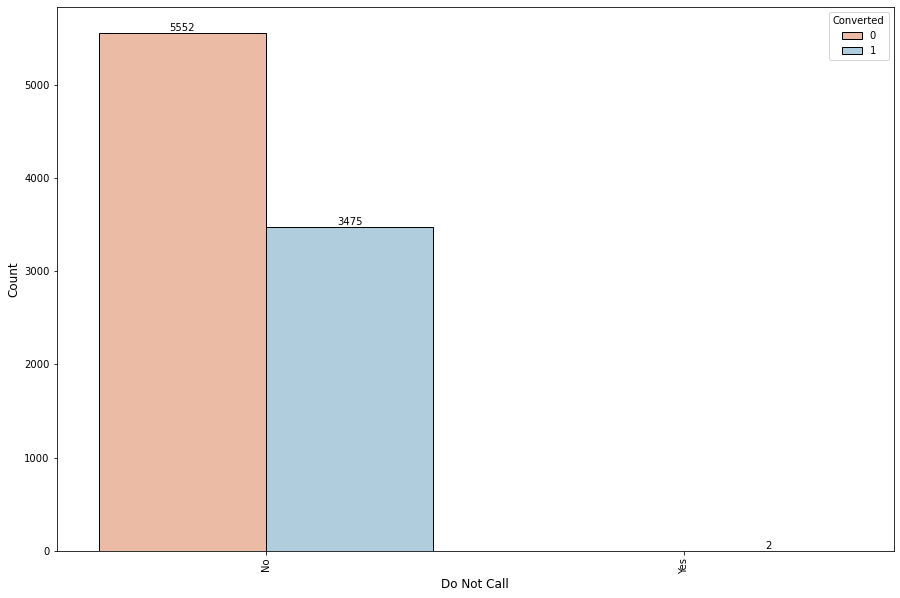

In [44]:
# Plotting the Do Not Call

Visualize("Do Not Call")

#### Inference:
- Almost all the leads converted when they recieved calls. Only 2 leads opted for "Do Not Call", and still got converted. 

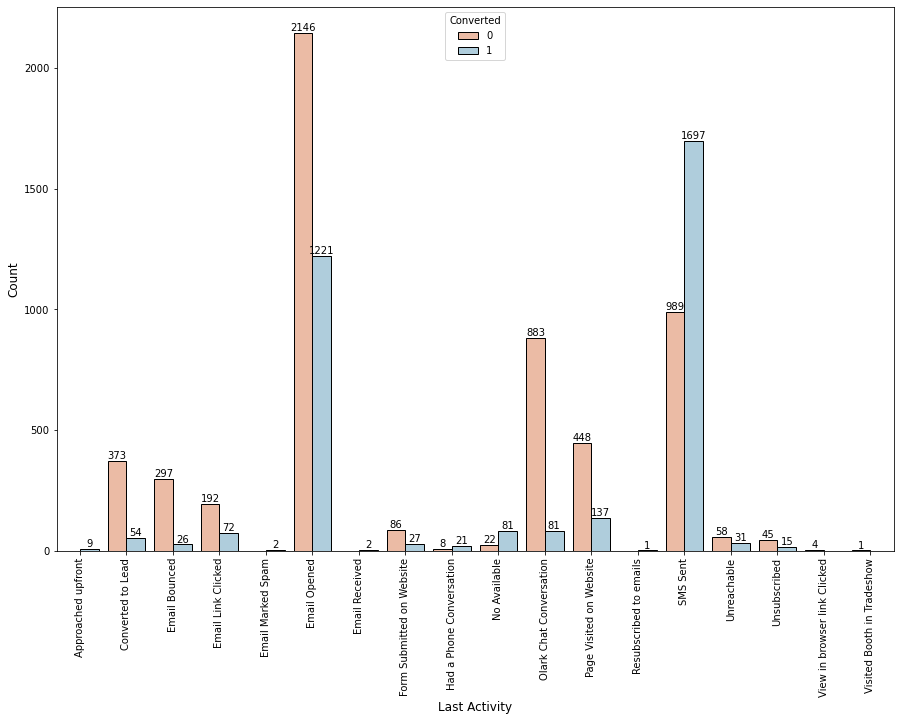

In [45]:
# Plotting the Last Activity Column

Visualize("Last Activity")

#### Inference:
- Majority of the leads converted after the last activity "SMS sent" followed by "Email Opened".

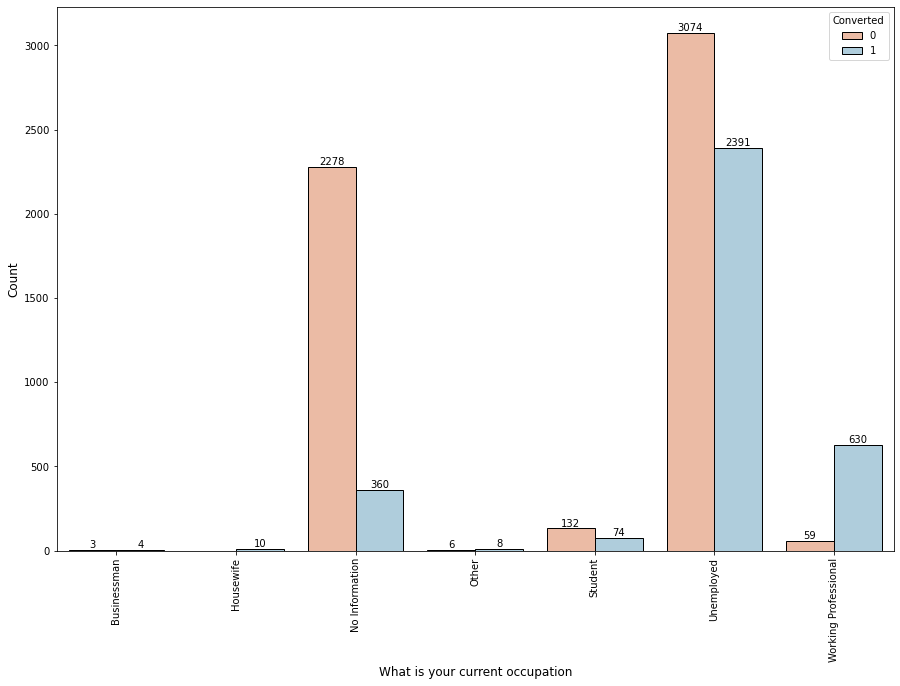

In [46]:
# Plotting the What is your current occupation Column

Visualize("What is your current occupation")

#### Inference:
- Majority of the leads converted are "Unemployed" followed by "Working Professionals". Out of the 10 leads from "Housewife", all for them converted.  

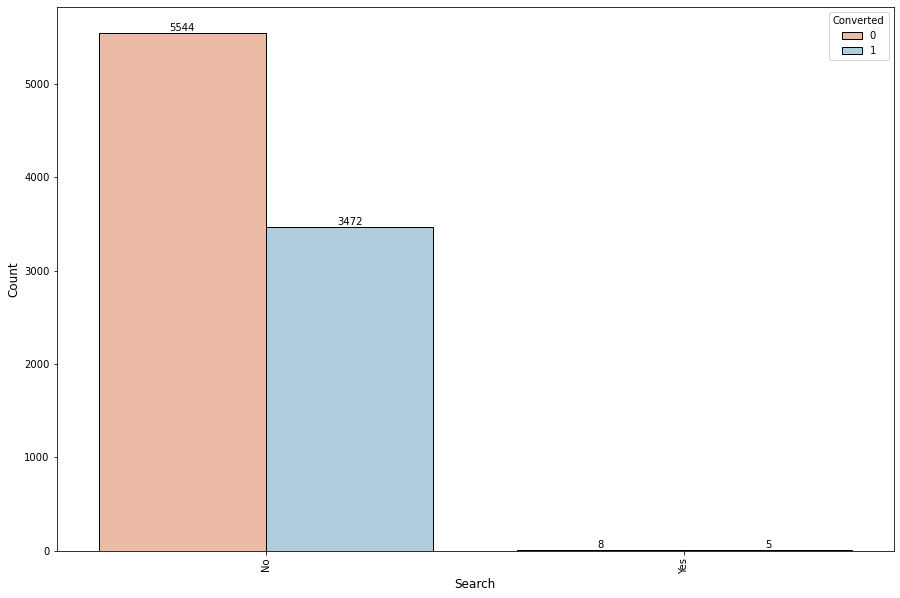

In [47]:
# Plotting the Search Column

Visualize("Search")

#### Inference:
- Majority of the leads are from "No" category. The conversion percentage is same from both the categories("Yes" and "No"). 

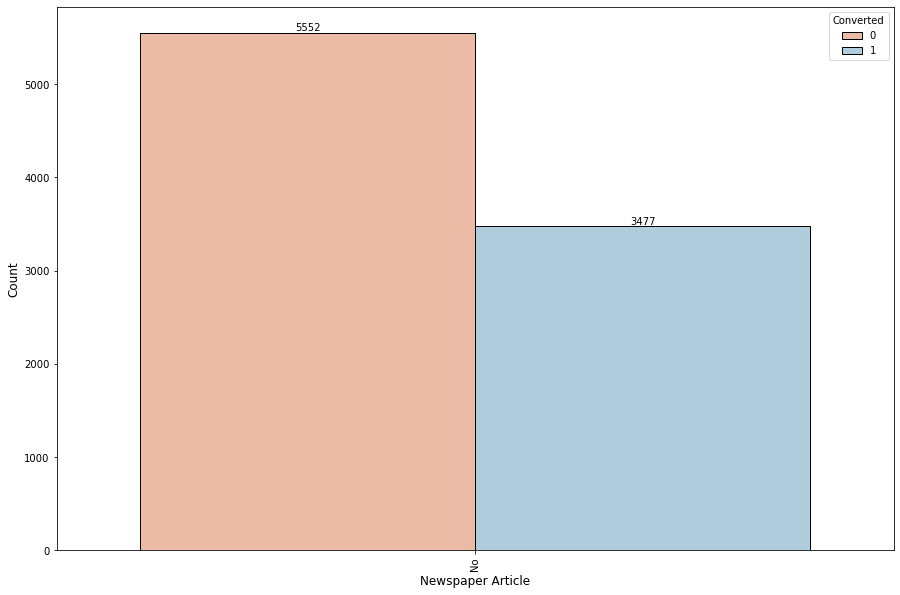

In [48]:
# Plotting the Newspaper Article Column

Visualize("Newspaper Article")

#### Inference:
- Newspaper Article column has only one value, that is "No". Hence it is safe to drop this column.  

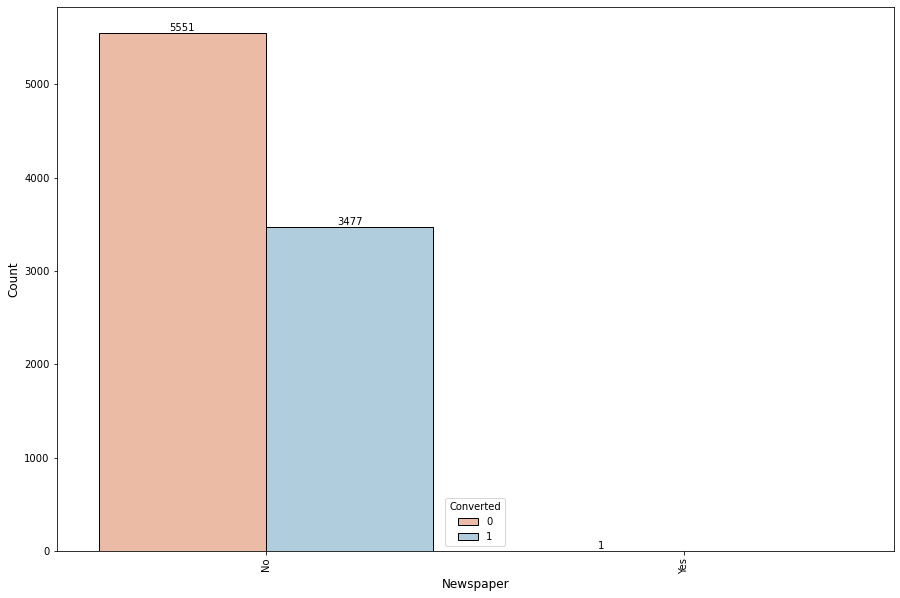

In [49]:
# Plotting the Newspaper Column

Visualize("Newspaper")

#### Inference:
- Newspaper column has only one row with a "Yes" value. Hence it is safe to drop this column as all other datapoints are in "No" category. 

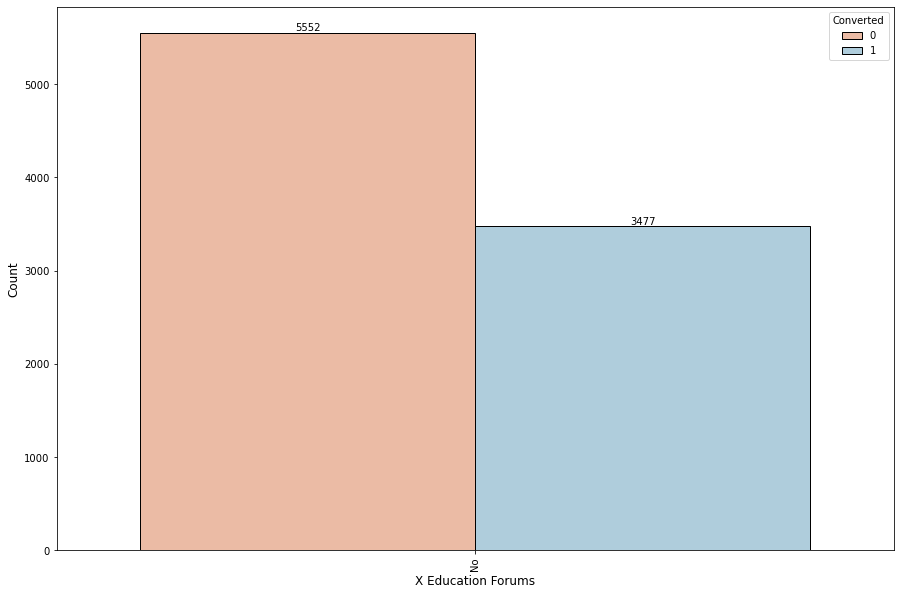

In [50]:
# Plotting the X Education Forums Column

Visualize("X Education Forums")

#### Inference:
- X Education Forums column has only one value, that is "No". Hence it is safe to drop this column. 

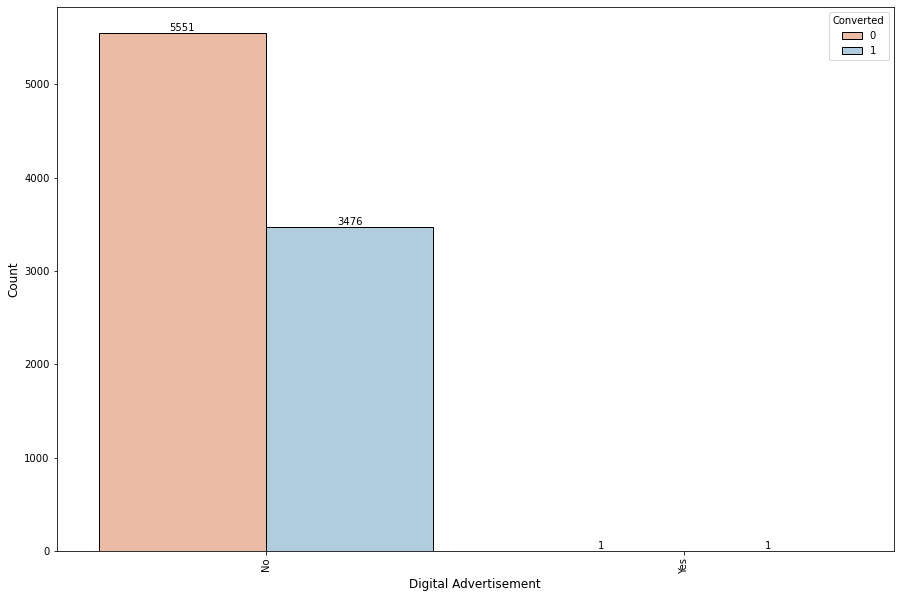

In [51]:
# Plotting the Digital Advertisement Column

Visualize("Digital Advertisement")

#### Inference:
- We can observe that there were only two leads from Digital Advertisement and one lead got converted. Hence, we can drop Digital advertisement column as almost all the datapoints lie in the "No" category except for two. 

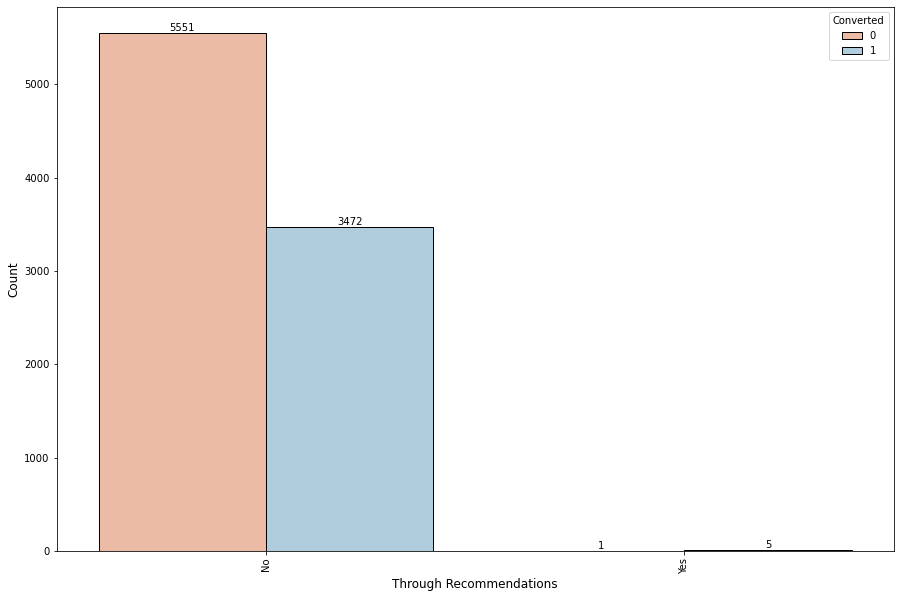

In [52]:
# Plotting the Through Recommendations Column

Visualize("Through Recommendations")

#### Inference:
- We can observe that there were six leads from recommendations and five leads got converted.

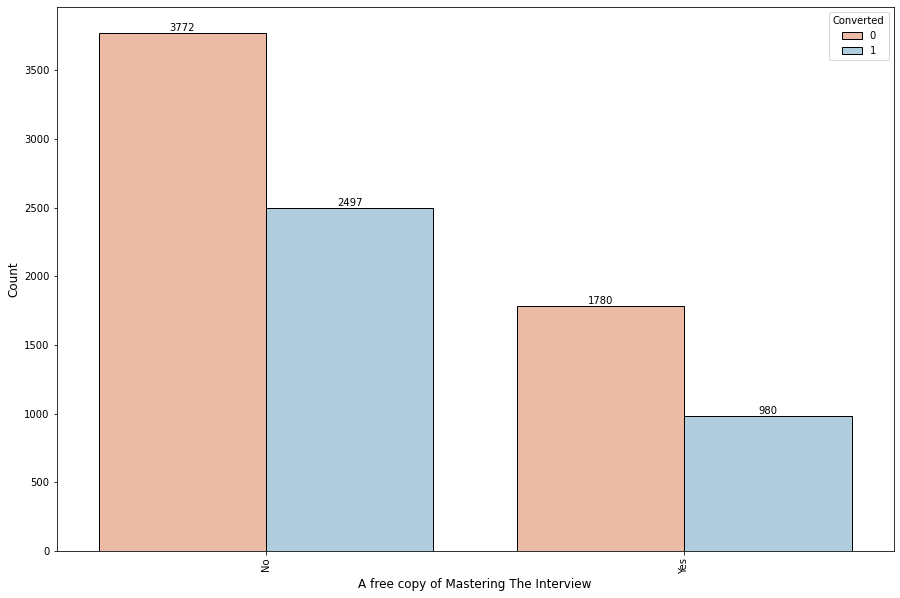

In [53]:
# Plotting the A free copy of Mastering The Interview Column

Visualize("A free copy of Mastering The Interview")

#### Inference:
- We received more number of leads who do no want a free copy of Mastering Interviews. Moreover the conversion rate is also high in the "No" category. 

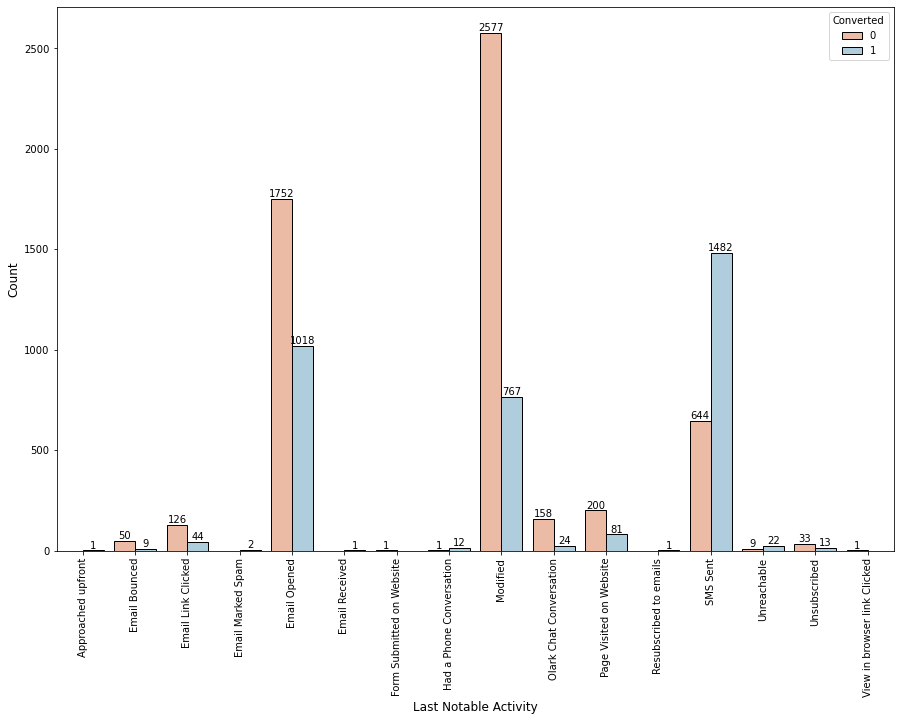

In [54]:
# Plotting the Last Notable Activity Column

Visualize("Last Notable Activity")

#### Inference:
- The results are very similar to "Last Activity" Column. The conversion rate is high for "SMS Sent" followed by "Email Opened".

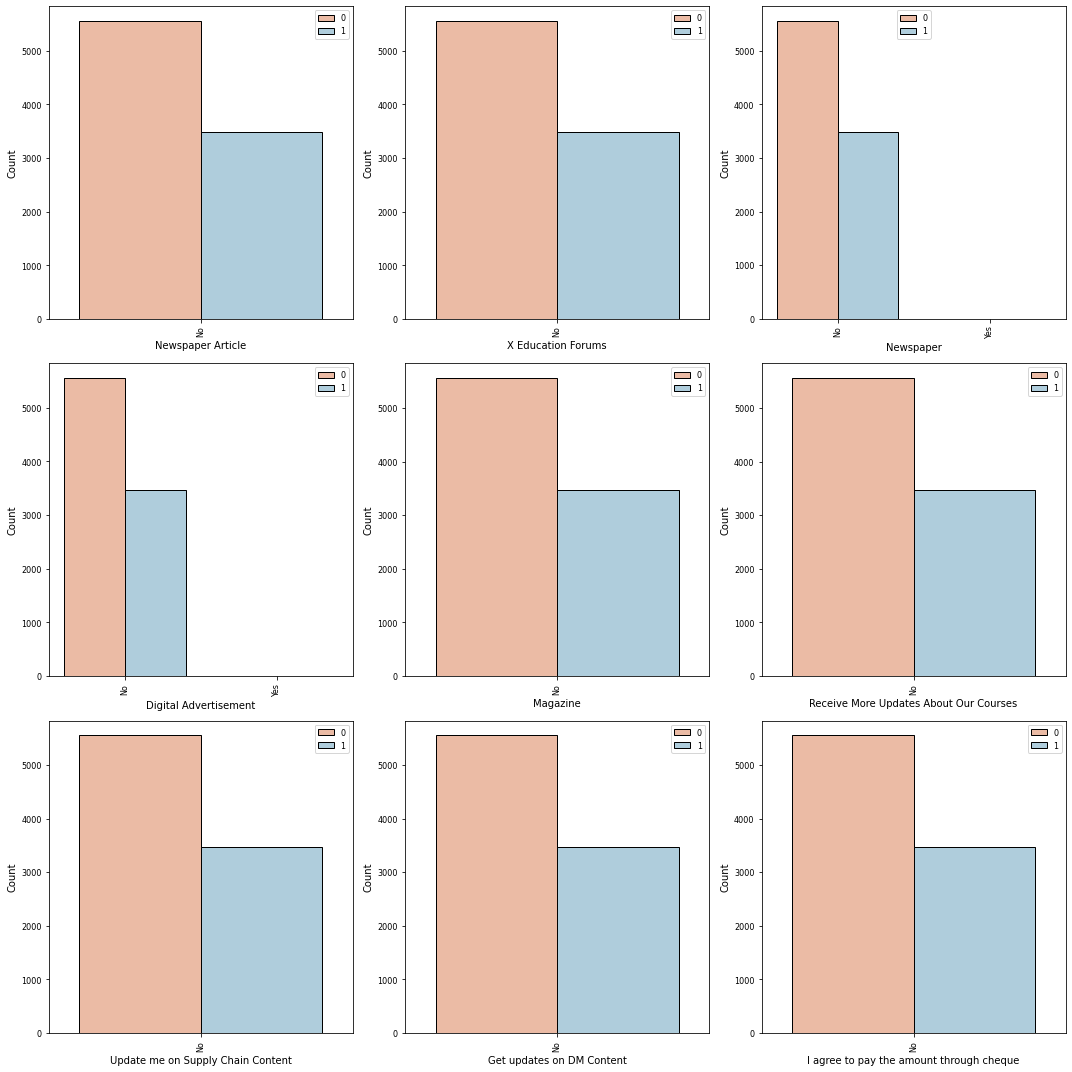

In [55]:
# Plotting the columns with only one value "No" in all the rows

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

columns = ["Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]


for i, column in enumerate(columns):
    row = i // 3  
    col = i % 3   
    

    data = df.groupby([column, 'Converted']).size().reset_index(name='Count')
    
    ax = sns.barplot(x=column, y='Count', hue='Converted', data=data, palette='RdBu', edgecolor='black', ax=axes[row, col])
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.legend(fontsize=8)
    
plt.tight_layout()
plt.show()

#### Inference:
- The plots clearly show that the columns have only single value - "No". Hence it is safe to drop the above columns.

In [56]:
# Dropping the above columns

columns = ["Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]

df = df.drop(columns, axis = 1)

In [57]:
# Checking the shape of the dataframe

df.shape

(9029, 16)

#### Checking the conversions for all numeric values

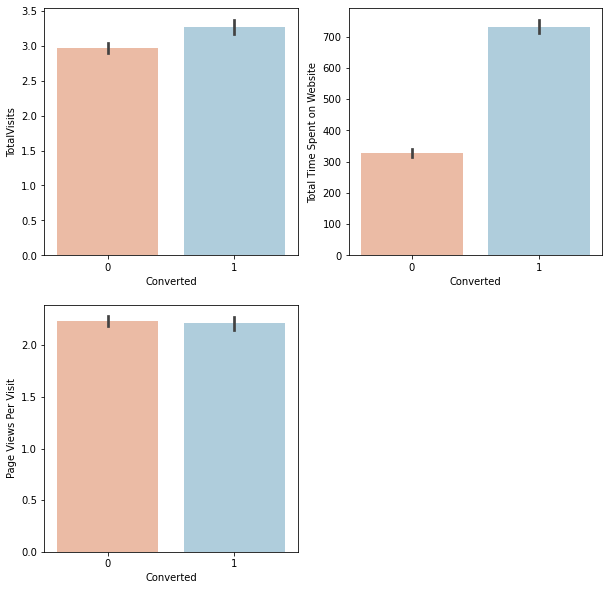

In [58]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='RdBu', data = df)
plt.subplot(2,2,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='RdBu', data = df)
plt.subplot(2,2,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='RdBu', data = df)
plt.show()

#### Inference:
- The conversion rate is more from leads who have spent more time on website. The converted leads have an average of more than 3 Total Visits. In case of Page Views Per Visit it is same for leads who have converted and who haven't. 

### Step 4: Data Preparation - Creating Dummies

In [59]:
# Converting Binary Variables (Yes/No) to 0/1

list_of_variables = ['Do Not Email', 'Do Not Call', 'Search', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({"Yes": 1, "No": 0})

# Applying the function to the columns
df[list_of_variables] = df[list_of_variables].apply(binary_map)

In [60]:
# Creating Dummy Variables for the columns Lead Origin, Lead Source, Last Activity, What is your current occupation
# and, Last Notable Activity

Lead_Origin_dum = pd.get_dummies(df["Lead Origin"],  prefix='LeadOrigin', drop_first = True)
Lead_Source_dum = pd.get_dummies(df["Lead Source"], prefix='LeadSource', drop_first = True)
Last_Activity_dum = pd.get_dummies(df["Last Activity"], prefix='LastActivity', drop_first = True)
What_is_your_current_occupation_dum = pd.get_dummies(df["What is your current occupation"], prefix='CurrentOccupation', drop_first = True)
Last_Notable_Activity_dum = pd.get_dummies(df["Last Notable Activity"], prefix='LastNotableActivity', drop_first = True)


In [61]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,Modified


In [62]:
# Merging the dataframe with the dummy variable dataset. 

dfl = pd.concat([df, Lead_Origin_dum, Lead_Source_dum, Last_Activity_dum, What_is_your_current_occupation_dum, Last_Notable_Activity_dum], axis = 1)

In [63]:
# Viewing the head of the new dataframe after merging

dfl.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
# Dropping the unrequired columns

unrequired_columns = ["Prospect ID", "Lead Number", "Lead Origin", "Lead Source", "Last Activity", "What is your current occupation", "Last Notable Activity"]

dfl = dfl.drop(unrequired_columns, axis = 1)

In [65]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 70 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Through Recommendations                           9029 non-null   int64  
 8   A free copy of Mastering The Interview            9029 non-null   int64  
 9   LeadOrigin_Landing 

- The Non-Null Count in the above table proves that no null values are present in the dataset.

In [66]:
dfl.shape

(9029, 70)

### Step 5: Test-Train Split

In [67]:
# Splitting the dataframe into Train and Test sets

np.random.seed(0)
df_train, df_test = train_test_split(dfl, train_size = 0.7, random_state = 100)

In [68]:
# Checking the shape of training and testing datasets

print(df_train.shape)
print(df_test.shape)

(6320, 70)
(2709, 70)


#### Using MinMaxScaler for Rescaling the Features

In [69]:
scaler = MinMaxScaler()

In [70]:
# Apply scaler() to all the columns except the "yes-no"(1 - 0) and "dummy" variables

num_vars = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [71]:
# Verifying the scaling in the train set

df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
5493,0,0,0,0.1250,0.042254,0.250,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
8064,0,0,0,0.1875,0.041373,0.375,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4716,1,0,0,0.1875,0.099032,0.375,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
9117,0,0,0,0.0000,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2402,0,0,1,0.3750,0.381162,0.250,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df_train.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
count,6320.000000,6320.0,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,...,6320.0,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,0.078006,0.0,0.381487,0.194502,0.212107,0.280978,0.001582,0.000633,0.306487,0.527690,...,0.0,0.001582,0.373418,0.019620,0.032278,0.000158,0.234019,0.003481,0.004589,0.000158
std,0.268203,0.0,0.485790,0.176284,0.239873,0.229087,0.039750,0.025152,0.461071,0.499272,...,0.0,0.039750,0.483750,0.138702,0.176753,0.012579,0.423418,0.058902,0.067589,0.012579
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.062500,0.004291,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.187500,0.105634,0.250000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,1.000000,0.250000,0.406690,0.375000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We will not be looking at correlation using heat map because there are 70 columns. Due to the huge number of columns we will not be able to infer anything from the heatmap. 

#### Dividing into X and Y sets for the Model Building 

In [73]:
y_train = df_train.pop("Converted")
X_train = df_train

In [74]:
# Recursive Feature Elimination (selects the features that fit the model and removes the features until the specified number is reached.)

lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False])

In [76]:
# Checking the number of variables selected - Format("name of the variable", Boolean value indicating if the feature is selected or not, and a rank indicating the relevance of the feature)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 50),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 33),
 ('Through Recommendations', False, 7),
 ('A free copy of Mastering The Interview', False, 45),
 ('LeadOrigin_Landing Page Submission', False, 25),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 32),
 ('LeadOrigin_Quick Add Form', False, 46),
 ('LeadSource_Direct Traffic', False, 8),
 ('LeadSource_Facebook', False, 31),
 ('LeadSource_Google', False, 11),
 ('LeadSource_Live Chat', False, 38),
 ('LeadSource_NC_EDM', False, 14),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 9),
 ('LeadSource_Pay per Click Ads', False, 47),
 ('LeadSource_Press_Release', False, 43),
 ('LeadSource_Reference', False, 19),
 ('LeadSource_Referral Sites', False, 10),
 ('LeadSource_Social Media', False, 15),
 ('LeadSource_WeLearn', False, 24),
 ('LeadSource_Welingak Website

In [77]:
# Selecting the variables selected by RFE 

selected_features = X_train.columns[rfe.support_]
print(selected_features)

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Available', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')


In [78]:
# Creating a dataframe with variables selected by RFE

X_train_RFE = X_train[selected_features]

In [79]:
# Viewing the features that have been rejected by RFE

X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Import',
       'LeadOrigin_Quick Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat',
       'LeadSource_NC_EDM', 'LeadSource_Organic Search',
       'LeadSource_Pay per Click Ads', 'LeadSource_Press_Release',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Social Media', 'LeadSource_WeLearn', 'LeadSource_bing',
       'LeadSource_blog', 'LeadSource_testone', 'LeadSource_welearnblog_Home',
       'LeadSource_youtubechannel', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Marked Spam', 'LastActivity_Email Opened',
       'LastActivity_Email Received', 'LastActivity_Form Submitted on Website',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Page Visited on Website',
       'LastActivity_Resubs

In [80]:
# Defining a function to create a dataframe that contains the names of all the feature variables and their respective VIFs
def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [81]:
def Build_Model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
    print(lm.summary())
    return lm

In [82]:
# Calculating the VIF of X_train_RFE

VIF(X_train_RFE)

,Features,VIF
3,Page Views Per Visit,5.47
1,TotalVisits,5.13
17,LastNotableActivity_Modified,2.88
10,LastActivity_Olark Chat Conversation,2.07
2,Total Time Spent on Website,2.03
0,Do Not Email,1.88
15,LastNotableActivity_Email Opened,1.86
8,LastActivity_Email Bounced,1.84
5,LeadSource_Olark Chat,1.80
4,LeadOrigin_Lead Add Form,1.62


- "Page Views Per Visit" and "TotalVisits" have high VIF values

### Step 6: Model Building

#### Model -1

In [83]:
# Building a model with all the columns in X_train_RFE

X_train_RFE.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Available', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')

In [84]:
cols = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Available', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website']

Build_Model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2519.2
Date:                Sun, 19 Mar 2023   Deviance:                       5038.4
Time:                        16:58:07   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4128
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [85]:
# Dropping "CurrentOccupation_Housewife" as it has high p-value, hence insignificant

X_train_1 = X_train_RFE.drop(["CurrentOccupation_Housewife"], axis = 1)


#### Inference:
- We have dropped "CurrentOccupation_Housewife". Lets build a new model without this column. 

#### Model - 2

In [86]:
# Building a model with all the columns in X_train_1

X_train_1.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Available', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')

In [87]:
cols = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Available', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website']

Build_Model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.0
Date:                Sun, 19 Mar 2023   Deviance:                       5047.9
Time:                        16:58:08   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [88]:
# Dropping "LastNotableActivity_Had a Phone Conversation" column as it has high p-value, hence insignificant

X_train_1 = X_train_1.drop(["LastNotableActivity_Had a Phone Conversation"], axis = 1)


#### Inference:
- We have dropped "LastNotableActivity_Had a Phone Conversation" column. Lets build a new model without this column.

#### Model - 3

In [89]:
# Building a model with all the columns in X_train_1(updated)

X_train_1.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Available', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')

In [90]:
cols = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_No Available', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website']

Build_Model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.2
Date:                Sun, 19 Mar 2023   Deviance:                       5052.4
Time:                        16:58:08   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4115
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

#### Inference:
- Model 3 seems to have significant p-values.
- Checking VIF of the model

In [91]:
# Calculating VIF for this model

VIF(X_train_1)

,Features,VIF
3,Page Views Per Visit,5.47
1,TotalVisits,5.13
15,LastNotableActivity_Modified,2.87
10,LastActivity_Olark Chat Conversation,2.07
2,Total Time Spent on Website,2.03
0,Do Not Email,1.88
14,LastNotableActivity_Email Opened,1.85
8,LastActivity_Email Bounced,1.84
5,LeadSource_Olark Chat,1.80
4,LeadOrigin_Lead Add Form,1.62


#### Inference: 
- "Page Views Per Visit" and "TotalVisits" have higher VIF.

In [92]:
# Dropping "Page Views Per Visit" column as it has high VIF 

X_train_1 = X_train_1.drop(["Page Views Per Visit"], axis = 1)

#### Model - 4

In [93]:
# Building a model with all the columns in X_train_1(updated)

X_train_1.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_No Available',
       'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')

In [94]:
cols = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_No Available',
       'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website']


In [95]:
X_train_sm = sm.add_constant(X_train_1[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2532.9
Date:                Sun, 19 Mar 2023   Deviance:                       5065.8
Time:                        16:58:08   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4102
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.8058      0.106     -7.626      0.000      -1.013      -0.599
Do Not Email                                   -1.3065      0.198     -6.598      0.000      -1.695      -0.918
TotalVisits                                     0.9369      0.250      3.742      0.000       0.446       1.428
Total Time Spent on Website                     4.5689      0.171     26.751      0.000       4.234       4.904
LeadOrigin_Lead Add Form                        3.8169      0.224     17.040      0.000       3.378       4.256
LeadSource_Olark Chat                           1.5488      0.123     12.594      0.000       1.308       1.790
LeadSource_Welingak Website                     2.1293      0.744      2.861      0.004       0.671       3.588
LastActivity_Converted to Lead                 -0.8189      0.220     -3.730      0.000      -1.249      -0.389
LastActivity_Email Bounced                     -1.1175      0.359     -3.117      0.002      -1.820      -0.415
LastActivity_No Available                      -1.6980      0.454     -3.740      0.000      -2.588      -0.808
LastActivity_Olark Chat Conversation           -1.2655      0.195     -6.506      0.000      -1.647      -0.884
CurrentOccupation_No Information               -1.1329      0.089    -12.736      0.000      -1.307      -0.959
CurrentOccupation_Working Professional          2.3504      0.182     12.929      0.000       1.994       2.707
LastNotableActivity_Email Link Clicked         -1.6310      0.259     -6.288      0.000      -2.139      -1.123
LastNotableActivity_Email Opened               -1.3862      0.090    -15.405      0.000      -1.563      -1.210
LastNotableActivity_Modified                   -1.6574      0.104    -15.992      0.000      -1.860      -1.454
LastNotableActivity_Olark Chat Conversation    -1.3982      0.377     -3.712      0.000      -2.136      -0.660
LastNotableActivity_Page Visited on Website    -1.8224      0.217     -8.389      0.000      -2.248      -1.397
===============================================================================================================
"""

In [96]:
# Calculating VIF for this model

VIF(X_train_1)

,Features,VIF
14,LastNotableActivity_Modified,2.75
1,TotalVisits,2.67
9,LastActivity_Olark Chat Conversation,2.07
2,Total Time Spent on Website,1.94
0,Do Not Email,1.86
7,LastActivity_Email Bounced,1.84
13,LastNotableActivity_Email Opened,1.77
4,LeadSource_Olark Chat,1.76
3,LeadOrigin_Lead Add Form,1.60
10,CurrentOccupation_No Information,1.59


#### Inference:
- This model seems to be stable with significant p-values, and all the columns have VIF < 4. Hence, we shall go ahead with this model for further analysis. 

In [97]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.104052
8064    0.109247
4716    0.013730
9117    0.344528
2402    0.475239
1796    0.035135
1120    0.035135
253     0.057269
1491    0.125597
2004    0.387121
dtype: float64

In [98]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10405204, 0.10924662, 0.01372963, 0.34452789, 0.47523947,
       0.03513469, 0.03513469, 0.05726853, 0.12559713, 0.38712128])

#### Creating a Dataframe with the actual converted flag and the predicted probabilities.

In [99]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Converted_Prob":y_train_pred})
y_train_pred_final["LeadId"] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.104052,5493
1,0,0.109247,8064
2,0,0.013730,4716
3,0,0.344528,9117
4,1,0.475239,2402


#### Creating a new column "predicted" with 1 if Converted_Prob > 0.5 else 0


In [100]:
y_train_pred_final["predicted"] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.104052,5493,0
1,0,0.109247,8064,0
2,0,0.013730,4716,0
3,0,0.344528,9117,0
4,1,0.475239,2402,0


#### Checking Confusion Matrixs and Accuracy

In [101]:
from sklearn import metrics

In [102]:
# Confusion Matrix

Confusion_Mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(Confusion_Mat)

[[3455  454]
 [ 706 1705]]


In [103]:
# Predicted     not_converted    converted
# Actual
# not_converted        3455      454
# converted            706       1705

In [104]:
# Checking the overall accuracy

Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(Accuracy)

0.8164556962025317


#### Inference:
- The accuracy is around 81.6% which is good. We also need to calculate other metrics as we cannot depend on accuracy metric alone. 

### Metrics - Sensitivity, Specificity, False Positive Rate, Positive Predictive Value and Negative Predictive Value

In [105]:
TP = Confusion_Mat[1,1] # true positive 
TN = Confusion_Mat[0,0] # true negatives
FP = Confusion_Mat[0,1] # false positives
FN = Confusion_Mat[1,0] # false negatives

In [106]:
# Sensitivity

Sensitivity = TP / float(TP + FN)
print("Sensitivity =", Sensitivity)

Sensitivity = 0.7071754458730817


In [107]:
# Specificity

Specificity = TN / float(TN + FP)
print("Specificity =", Specificity)

Specificity = 0.8838577641340496


In [108]:
# False Positive Rate - Predicting non converted leads as converted

False_Positive_Rate = FP / float(TN + FP)
print("False_Positive_Rate = ", False_Positive_Rate)

False_Positive_Rate =  0.11614223586595038


In [109]:
# Positive Predictive Value

Positive_Predictive_Value = TP / float(TP + FP)
print("Positive_Predictive_Value = ", Positive_Predictive_Value)

Positive_Predictive_Value =  0.7897174617878647


In [110]:
# Negative Predictive Value

Negative_Predictive_Value = TN / float(TN + FN)
print("Negative_Predictive_Value = ", Negative_Predictive_Value)

Negative_Predictive_Value =  0.8303292477769767


### Step 7: Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False)

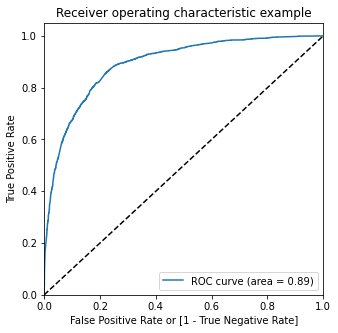

In [113]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 8: Finding Optimal Cutoff Point

- Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [114]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.104052,5493,0,1,1,0,0,0,0,0,0,0,0
1,0,0.109247,8064,0,1,1,0,0,0,0,0,0,0,0
2,0,0.013730,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.344528,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.475239,2402,0,1,1,1,1,1,0,0,0,0,0


In [115]:
# Calculating accuracy, sensitivity, and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ["Prob", "accuracy", "Sensitivity", "Specificity"])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [ i, accuracy, Sensitivity, Specificity]
print(cutoff_df)

     Prob  accuracy  Sensitivity  Specificity
0.0   0.0  0.381487     1.000000     0.000000
0.1   0.1  0.615823     0.975529     0.393963
0.2   0.2  0.763924     0.911240     0.673062
0.3   0.3  0.805696     0.865201     0.768995
0.4   0.4  0.818038     0.788884     0.836019
0.5   0.5  0.816456     0.707175     0.883858
0.6   0.6  0.810443     0.633762     0.919417
0.7   0.7  0.787816     0.520946     0.952417
0.8   0.8  0.760443     0.421817     0.969302
0.9   0.9  0.718038     0.282041     0.986953


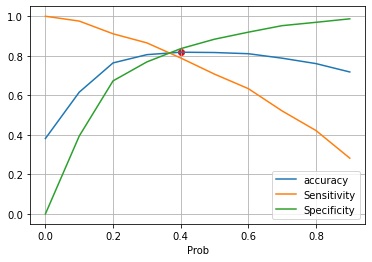

In [116]:
# Plotting Accuracy, Sensitivity, and Specificity for various probabilities to find the intersection.
intersection = cutoff_df.loc[cutoff_df[["accuracy", "Sensitivity", "Specificity"]].idxmax().value_counts().idxmax()]
 
cutoff_df.plot.line(x = "Prob", y = ["accuracy", "Sensitivity", "Specificity"])

plt.scatter(intersection["Prob"], intersection["accuracy"], color = "red")
plt.legend()
plt.grid(True)
plt.show()

In [117]:
# FInding out the exact probability where Accuracy, Sensitivity, and Specificity intersect. 

cutoff_df_tf = pd.DataFrame(columns=["Prob", "accu", "Sensitiv", "Specific"])

# creating a list of probabilities to check the metrics
num = [0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40]

# looping through the list of probabilities and calculating metrics for each
for i in num:
    # converting the predicted probability to predicted value of conversion based on the threshold i
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
    
    # calculating the confusion matrix
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    
    # calculating total observations
    total1 = float(sum(sum(cm1)))
    
    # calculating accuracy
    accu = (cm1[0, 0] + cm1[1, 1]) / total1
    
    # calculating sensitivity
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    # calculating specificity
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    
    # printing the accuracy, sensitivity, specificity for each threshold
    print("Threshold:", i, "Accuracy:", accu, "Sensitivity:", sensi, "Specificity:", speci)


Threshold: 0.31 Accuracy: 0.8072784810126582 Sensitivity: 0.8627125673994194 Specificity: 0.7730877462266564
Threshold: 0.32 Accuracy: 0.8082278481012658 Sensitivity: 0.8589796764827873 Specificity: 0.776925044768483
Threshold: 0.33 Accuracy: 0.8079113924050633 Sensitivity: 0.8556615512235587 Specificity: 0.7784599641852136
Threshold: 0.34 Accuracy: 0.8091772151898734 Sensitivity: 0.8531729572791373 Specificity: 0.7820414428242517
Threshold: 0.35 Accuracy: 0.8118670886075949 Sensitivity: 0.820821236001659 Specificity: 0.8063443335891533
Threshold: 0.36 Accuracy: 0.8150316455696203 Sensitivity: 0.8166735794276234 Specificity: 0.8140189306728064
Threshold: 0.37 Accuracy: 0.8156645569620253 Sensitivity: 0.8071339693073414 Specificity: 0.8209260680480941
Threshold: 0.38 Accuracy: 0.8167721518987342 Sensitivity: 0.8021567814184986 Specificity: 0.8257866462010744
Threshold: 0.39 Accuracy: 0.8169303797468355 Sensitivity: 0.7963500622148486 Specificity: 0.829623944742901
Threshold: 0.4 Accurac

#### Inference:
- It seems the  0.36 is the closest point (Probability) at which Accuracy, Sensitivity, and Specificity meet. Hence 0.36 is the optimum point to take it as a cutoff probability.

In [118]:
# Making final predictions using 0.36 as the cutoff

y_train_pred_final["final_predicted"] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0 )
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,...,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,final_predicted
0,0,0.104052,5493,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.109247,8064,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.013730,4716,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.344528,9117,0,1,1,1,1,0,0,...,1,1,1,1,0,0,0,0,0,0
4,1,0.475239,2402,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [119]:
# Calculating the lead score

y_train_pred_final["lead_score"] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,...,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,final_predicted,lead_score
0,0,0.104052,5493,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,0,0.109247,8064,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2,0,0.013730,4716,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.344528,9117,0,1,1,1,1,0,0,...,1,1,1,0,0,0,0,0,0,34
4,1,0.475239,2402,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,48
5,0,0.035135,1796,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
6,0,0.035135,1120,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7,0,0.057269,253,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
8,0,0.125597,1491,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
9,1,0.387121,2004,0,1,1,1,1,0,0,...,1,1,1,1,1,1,1,0,1,39


In [120]:
# Checking if 80% cases are correctly predicted based on the converted column.
# Getting the total of final predicted conversion / non conversion counts from the actual converted rates

Checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
Checking_df['final_predicted'].value_counts()


1    1946
0     465
Name: final_predicted, dtype: int64

In [121]:
# Checking the percentage of final predicted conversions

print("Percentage = ", 1946/float(1946 + 465))

Percentage =  0.8071339693073414


#### Inference:
- The Final prediction of conversions have a target of 80% conversion as per the X Education's CEO requirement. 
- This model has 80.7% of lead conversion rate predictability.

### Metrics of the Final Model


In [122]:
# Accuracy.

print("Accuracy = ", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy =  0.8156645569620253


In [123]:
# Confusion Matrix

Confusion_Mat2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
Confusion_Mat2

array([[3209,  700],
       [ 465, 1946]], dtype=int64)

In [124]:
TP = Confusion_Mat2[1,1] # true positive 
TN = Confusion_Mat2[0,0] # true negatives
FP = Confusion_Mat2[0,1] # false positives
FN = Confusion_Mat2[1,0] # false negatives

In [125]:
# Sensitivity

print("Sensitivity = ", TP / float(TP+FN))

Sensitivity =  0.8071339693073414


In [126]:
# Specificity

print("Specificity = ", TN / float(TN+FP))

Specificity =  0.8209260680480941


In [127]:
# False Positive Rate - Predicting non converted leads as converted

print("False Positive Rate = ", (FP/ float(TN+FP)))

False Positive Rate =  0.17907393195190585


In [128]:
# Positive Predictive Value

print("Positive Predictive Value = ", (TP / float(TP+FP)))

Positive Predictive Value =  0.7354497354497355


In [129]:
# Negative Predictive Value

print("Negative Predictive Value = ", TN / float(TN+ FN))

Negative Predictive Value =  0.8734349482852477


#### Metrics - Precision and Recall

In [130]:
# Looking at the confusion matrix 

Confusion_Mat

array([[3455,  454],
       [ 706, 1705]], dtype=int64)

In [131]:
# Precision

print("Precision score = ", precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision score =  0.7897174617878647


In [132]:
# Recall

print("Recall score = ", recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall score =  0.7071754458730817


#### Precision and Recall tradeoff

In [133]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

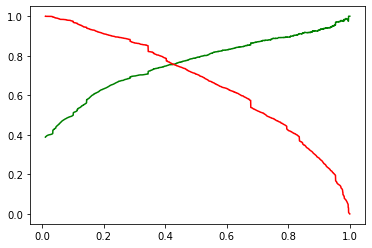

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 9: Making Predictions on the Test Set

In [136]:
X_test = df_test
y_test = df_test.pop("Converted")

In [137]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [138]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_No Available,LastActivity_Olark Chat Conversation,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website
4664,0,0.0000,0.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5394,0,0.2500,0.072183,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1595,0,0.2500,0.515405,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2111,0,0.4375,0.229754,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9182,0,0.0000,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [139]:
# Adding Constant to the test set

X_test_sm = sm.add_constant(X_test)

In [140]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [141]:

y_test_pred[:10]

4664    0.344528
5394    0.184938
1595    0.922462
2111    0.134096
9182    0.286104
1055    0.498239
541     0.065364
446     0.975969
3728    0.014466
4249    0.011585
dtype: float64

In [142]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [143]:
# Checking the head of the dataframe

y_pred_1.head()

,0
4664,0.344528
5394,0.184938
1595,0.922462
2111,0.134096
9182,0.286104


In [144]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [145]:
# Putting LeadId to Index

y_test_df['LeadId'] = y_test_df.index

In [146]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [148]:
# Checking the head of the final dataframe

y_pred_final.head()

,Converted,LeadId,0
0,0,4664,0.344528
1,0,5394,0.184938
2,1,1595,0.922462
3,0,2111,0.134096
4,0,9182,0.286104


In [149]:
# Renaming the column

y_pred_final = y_pred_final.rename(columns = { 0 : "Converted_Prob"})

In [150]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns = ['LeadId','Converted','Converted_Prob'])

In [151]:
# Checking the head

y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,4664,0,0.344528
1,5394,0,0.184938
2,1595,1,0.922462
3,2111,0,0.134096
4,9182,0,0.286104


In [152]:
# Based on cut off threshold using accuracy, sensitivity, and specificity of 0.36%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [153]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,4664,0,0.344528,0
1,5394,0,0.184938,0
2,1595,1,0.922462,1
3,2111,0,0.134096,0
4,9182,0,0.286104,0


In [154]:
# Calculating the lead score

y_pred_final["Lead_Score"] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,Lead_Score
0,4664,0,0.344528,0,34
1,5394,0,0.184938,0,18
2,1595,1,0.922462,1,92
3,2111,0,0.134096,0,13
4,9182,0,0.286104,0,29
5,1055,1,0.498239,1,50
6,541,0,0.065364,0,7
7,446,1,0.975969,1,98
8,3728,0,0.014466,0,1
9,4249,0,0.011585,0,1


In [155]:
# Checking if 80% cases are correctly predicted based on the converted column.

# Getting the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    870
0    196
Name: final_predicted, dtype: int64

In [157]:
# Checking the percentage of final predicted conversions on test data

print("Percentage = ", 870/float(870+196))

Percentage =  0.8161350844277674


#### Inference:
- We can see that the final prediction of conversions have a target rate of 81.6% (Requirement - 80%)

### Overall Metrics
#### Accuracy, Confusion Metrics, Sensitivity, Specificity of the test set

In [158]:
# Accuracy

print("Accuracy -", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy - 0.8087855297157622


In [160]:
# Confusion Metrics

Confusion_Metrics = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
Confusion_Metrics

array([[1321,  322],
       [ 196,  870]], dtype=int64)

In [162]:
TP = Confusion_Metrics[1,1] # true positive 
TN = Confusion_Metrics[0,0] # true negatives
FP = Confusion_Metrics[0,1] # false positives
FN = Confusion_Metrics[1,0] # false negatives

In [163]:
# Sensitivity

print("Sensitivity -", TP / float(TP+FN))

Sensitivity - 0.8161350844277674


In [164]:
# Specificity

print("Specificity -", TN / float(TN+FP))

Specificity - 0.8040170419963482


#### Precision and Recall metrics for the test set

In [165]:
# Precision
print('Precision ', precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# Recall
print('Recall ', recall_score(y_pred_final.Converted, y_pred_final.final_predicted))


Precision  0.7298657718120806
Recall  0.8161350844277674


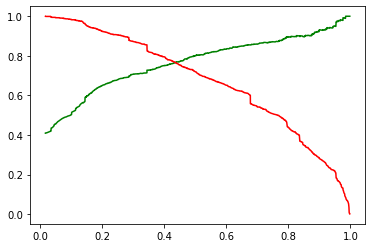

In [166]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Conclusion:

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity, and Specificity values of both trained set and test set are approximately closer 
  - Test set - 81%, 81.6%, 80.4%
  - Train set - 81%, 81%, 82%
- The lead score calculated in the trained set of data shows the conversion rate on the final predicted model to be around 80%, which matches with the test set.
- Hence, this seems to be a good model. 